# Why People Leaving ?

In [175]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import patsy
%matplotlib inline

In [2]:
hr = pd.read_csv("HR.csv",delimiter=";")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
indep = [i for i in hr.columns if i not in 'left']

In [ ]:
indep.append('left')

## 종속변수 

In [91]:
dep = hr.columns[-1]
y = hr[dep]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: object

In [89]:
hr = hr.reindex(columns=indep)
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [35]:
hr['Work_accident'] = hr['Work_accident'].astype('object')
hr['left'] = hr['left'].astype('object')
hr['promotion_last_5years'] = hr['promotion_last_5years'].astype('object')

In [36]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null object
promotion_last_5years    14999 non-null object
sales                    14999 non-null object
salary                   14999 non-null object
left                     14999 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ MB


In [117]:
discrete = []
continuous = []
for v in indep:
    if hr[v].dtype == 'object':
        discrete.append(v)
    else:
        continuous.append(v)

In [38]:
discrete

['Work_accident', 'promotion_last_5years', 'sales', 'salary', 'left']

In [39]:
continuous

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company']

In [42]:
left_member = hr[ hr['left'] == 1]
join_member = hr[ hr['left'] == 0]

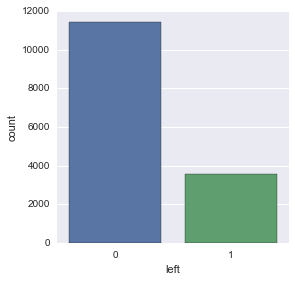

In [45]:
sns.factorplot('left',kind='count',data=hr)

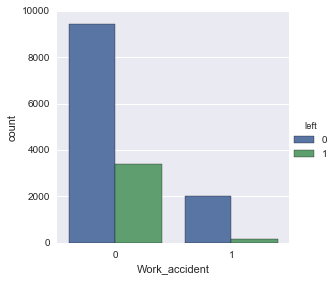

In [46]:
sns.factorplot('Work_accident',kind='count',hue='left',data=hr)

### 회사 생활 만족도.
- 기본적으로 만족을 못하는 인원이 나가는 건 당연한 얘기 

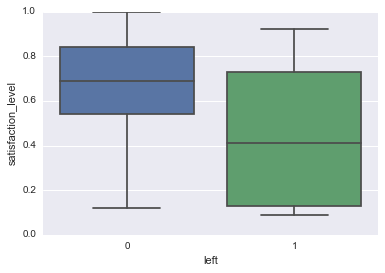

In [48]:
sns.boxplot(x='left',y='satisfaction_level',data=hr)

In [60]:
stats.ttest_ind(left_member['satisfaction_level'], join_member['satisfaction_level']) # 대립 가설 택, 차이가 있다. 

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

### 마지막 평가  
 - 오히려 마지막 평가는 나간사람이 평균적으로 더 좋은 평가를 받았다.
 - 나가기 직전에는 평가를 좋게 받던 나쁘게 받던 상관이 없는 듯하다.

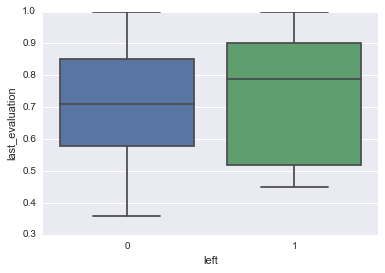

In [49]:
sns.boxplot(x='left',y='last_evaluation',data=hr) 

In [58]:
stats.ttest_ind(left_member['last_evaluation'], join_member['last_evaluation']) # 귀무가설 택, 유의하게 차이가 있지 않다.

Ttest_indResult(statistic=0.80424161677963291, pvalue=0.4212701963735056)

### 프로젝트 횟수 
 - 프로젝트 횟수가 3~5 정도 인원은 나갈 확률이 적다. 
 - 프로젝트를 적게 수행했거나, 많이 수행했거나 하는 인원 중에서 많이 나갔다. 

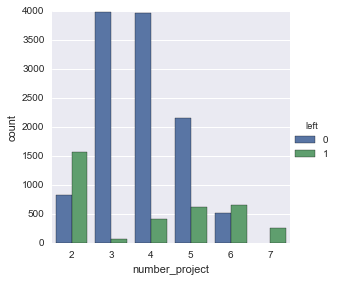

In [52]:
sns.factorplot('number_project',kind='count',hue='left',data=hr)

### 평균 일한 시간 / 달
 - 크게 차이가 보이지는 않는 듯하다. 

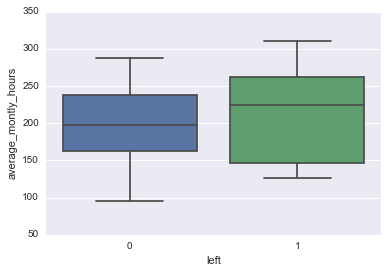

In [53]:
sns.boxplot(x='left',y='average_montly_hours',data=hr) 

In [56]:
stats.ttest_ind(left_member['average_montly_hours'], join_member['average_montly_hours']) # 기각, 즉, 두개의 평균이 유의하게 차이가 있다.

Ttest_indResult(statistic=8.7522547318500088, pvalue=2.3113035567540143e-18)

### 회사에서 보내는 시간 
 - 퇴사자의 경우가 회사에서 보낸 시간이 많다. 

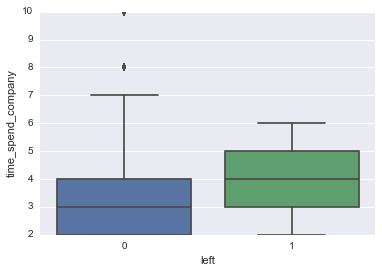

In [61]:
sns.boxplot(x='left',y='time_spend_company',data=hr) 

In [62]:
stats.ttest_ind(left_member['time_spend_company'], join_member['time_spend_company']) # 기각, 즉, 두개의 평균이 유의하게 차이가 있다.

Ttest_indResult(statistic=17.924210234916142, pvalue=4.2076804576928353e-71)

### 5년 내 승진 
 - 승진을 못한 사람이 승진을 한사람보다 퇴사를 했던 안했던 비율이 많다. 

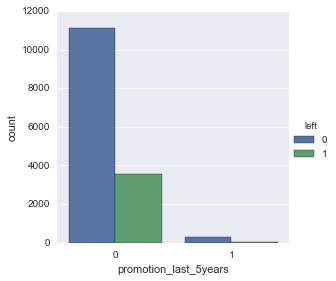

In [65]:
sns.factorplot('promotion_last_5years',kind='count',hue='left',data=hr)

### 직군 별 퇴사 비율 

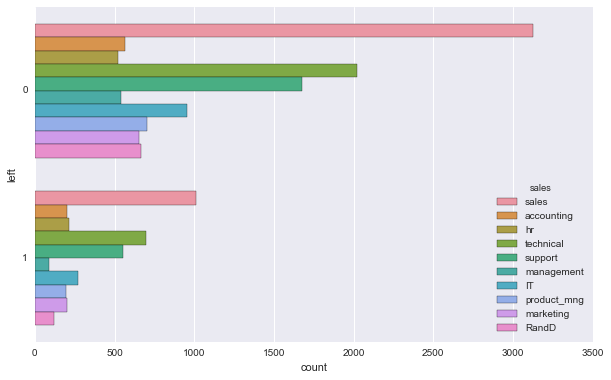

In [84]:
plt.figure(figsize=(10,6))
sns.countplot(y="left", hue="sales", data=hr)

### 월급 

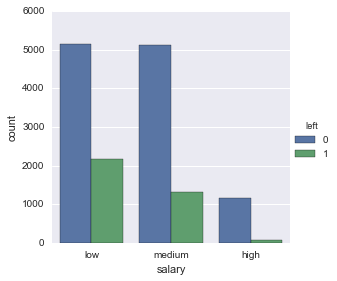

In [85]:
sns.factorplot('salary',kind='count',hue='left',data=hr)

## 현재까지의 결론 
 - 회사 만족도가 낮고
 - 프로젝트 수가 2개 또는 6개 이상 수행한 인원 
 - 회사에서 보낸 시간이 많으며, 일한 시간 자체가 많은 인원일 수록
 - Sales, Technical, Management 순으로 많이 퇴사한 것으로 보여진다.

## 분류 분석 

In [242]:
hr = pd.read_csv("HR.csv",delimiter=";")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [243]:
dep = hr.columns.difference(['left'])
dep

Index(['Work_accident', 'average_montly_hours', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary', 'sales',
       'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [244]:
y = hr['left']

In [245]:
hr['Work_accident'] = hr['Work_accident'].astype('object')
hr['left'] = hr['left'].astype('object')
hr['promotion_last_5years'] = hr['promotion_last_5years'].astype('object')

In [246]:
discrete = []
continuous = []
for v in dep:
    if hr[v].dtype == 'object':
        discrete.append(v)
    else:
        continuous.append(v)

In [247]:
discrete

['Work_accident', 'promotion_last_5years', 'salary', 'sales']

In [248]:
continuous

['average_montly_hours',
 'last_evaluation',
 'number_project',
 'satisfaction_level',
 'time_spend_company']

In [249]:
dummy = pd.get_dummies(hr[discrete])
X = pd.concat([hr[continuous], dummy], axis=1)

In [250]:
X.head()

,average_montly_hours,last_evaluation,number_project,satisfaction_level,time_spend_company,Work_accident_0,Work_accident_1,promotion_last_5years_0,promotion_last_5years_1,salary_high,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,157,0.53,2,0.38,3,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,262,0.86,5,0.80,6,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,272,0.88,7,0.11,4,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,223,0.87,5,0.72,5,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,159,0.52,2,0.37,3,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Logistic Regression
 - 연속형 변수로만 사용해야 된다. 
 - 명목형이 들어가니 문제가 생기네. 

In [251]:
' + '.join(continuous_hr.columns.difference(['left']))

'average_montly_hours + last_evaluation + number_project + satisfaction_level + time_spend_company'

In [252]:
y = y.to_frame()

In [253]:
df = pd.concat([X,y]).fillna(0)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29998 entries, 0 to 14998
Data columns (total 23 columns):
Work_accident_0            29998 non-null float64
Work_accident_1            29998 non-null float64
average_montly_hours       29998 non-null float64
last_evaluation            29998 non-null float64
left                       29998 non-null float64
number_project             29998 non-null float64
promotion_last_5years_0    29998 non-null float64
promotion_last_5years_1    29998 non-null float64
salary_high                29998 non-null float64
salary_low                 29998 non-null float64
salary_medium              29998 non-null float64
sales_IT                   29998 non-null float64
sales_RandD                29998 non-null float64
sales_accounting           29998 non-null float64
sales_hr                   29998 non-null float64
sales_management           29998 non-null float64
sales_marketing            29998 non-null float64
sales_product_mng          29998 non-null

In [255]:
df.head()

,Work_accident_0,Work_accident_1,average_montly_hours,last_evaluation,left,number_project,promotion_last_5years_0,promotion_last_5years_1,salary_high,salary_low,...,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,satisfaction_level,time_spend_company
0,1.0,0.0,157.0,0.53,0.0,2.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.38,3.0
1,1.0,0.0,262.0,0.86,0.0,5.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.80,6.0
2,1.0,0.0,272.0,0.88,0.0,7.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.11,4.0
3,1.0,0.0,223.0,0.87,0.0,5.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.72,5.0
4,1.0,0.0,159.0,0.52,0.0,2.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.37,3.0


In [256]:
model = 'left ~ ' + ' + '.join(df.columns.difference(['left']))

In [257]:
Logi_y, Logi_X = patsy.dmatrices(model, df, return_type='dataframe')

In [258]:
sm.Logit(Logi_y, Logi_X).fit().summary()

         Current function value: 0.274430
         Iterations: 35


C:\Anaconda3\envs\work\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                29998
Model:                          Logit   Df Residuals:                    29978
Method:                           MLE   Df Model:                           19
Date:                Wed, 18 Jan 2017   Pseudo R-squ.:                  0.2482
Time:                        23:25:32   Log-Likelihood:                -8232.3
converged:                      False   LL-Null:                       -10950.
                                        LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  -1.1632      0.019    -60.675      0.000        -1.201    -1.126
Work_accident_0            -2.4152        nan        nan        nan           nan       nan
Work_accident_1             1.1414        nan        nan        nan           nan       nan
average_montly_hours       -0.1761     82.147     -0.002      0.998      -161.182   160.830
last_evaluation             1.4709   6024.307      0.000      1.000     -1.18e+04  1.18e+04
number_project             -1.9360   1598.824     -0.001      0.999     -3135.573  3131.701
promotion_last_5years_0     9.8659   1.59e+10   6.21e-10      1.000     -3.11e+10  3.11e+10
promotion_last_5years_1   -12.2328   2.42e+10  -5.06e-10      1.000     -4.74e+10  4.74e+10
salary_high                -6.8232        nan        nan        nan           nan       nan
salary_low                  1.6644        nan        nan        nan           nan       nan
salary_medium               3.4280        nan        nan        nan           nan       nan
sales_IT                    3.9404        nan        nan        nan           nan       nan
sales_RandD                -4.6273        nan        nan        nan           nan       nan
sales_accounting            4.7821        nan        nan        nan           nan       nan
sales_hr                    4.1899        nan        nan        nan           nan       nan
sales_management           -1.2649        nan        nan        nan           nan       nan
sales_marketing            -4.3731        nan        nan        nan           nan       nan
sales_product_mng          -4.8307        nan        nan        nan           nan       nan
sales_sales                -0.9468        nan        nan        nan           nan       nan
sales_support              -3.4362        nan        nan        nan           nan       nan
sales_technical             4.7687        nan        nan        nan           nan       nan
satisfaction_level         -4.6768   5502.460     -0.001      0.999     -1.08e+04  1.08e+04
time_spend_company         -2.3373   1619.756     -0.001      0.999     -3177.000  3172.325
===========================================================================================

Possibly complete quasi-separation: A fraction 0.50 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### 연속형

In [259]:
continuous_df = hr[continuous]
continuous_df.head()

,average_montly_hours,last_evaluation,number_project,satisfaction_level,time_spend_company
0,157,0.53,2,0.38,3
1,262,0.86,5,0.80,6
2,272,0.88,7,0.11,4
3,223,0.87,5,0.72,5
4,159,0.52,2,0.37,3


In [260]:
df = pd.concat([continuous_df,y]).fillna(0)

In [261]:
df.head()

,average_montly_hours,last_evaluation,left,number_project,satisfaction_level,time_spend_company
0,157.0,0.53,0.0,2.0,0.38,3.0
1,262.0,0.86,0.0,5.0,0.80,6.0
2,272.0,0.88,0.0,7.0,0.11,4.0
3,223.0,0.87,0.0,5.0,0.72,5.0
4,159.0,0.52,0.0,2.0,0.37,3.0


In [262]:
model = 'left ~ ' + ' + '.join(df.columns.difference(['left']))

In [264]:
Logi_y, Logi_X = patsy.dmatrices(model, df, return_type='dataframe')

In [267]:
sm.Logit(Logi_y, Logi_X).fit().summary()

         Current function value: 0.274430
         Iterations: 35


C:\Anaconda3\envs\work\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                29998
Model:                          Logit   Df Residuals:                    29992
Method:                           MLE   Df Model:                            5
Date:                Wed, 18 Jan 2017   Pseudo R-squ.:                  0.2482
Time:                        23:26:33   Log-Likelihood:                -8232.3
converged:                      False   LL-Null:                       -10950.
                                        LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               -1.1632      0.019    -60.675      0.000        -1.201    -1.126
average_montly_hours    -0.1155   3.36e+04  -3.44e-06      1.000     -6.59e+04  6.59e+04
last_evaluation         -0.3639   1.54e+06  -2.36e-07      1.000     -3.02e+06  3.02e+06
number_project          -0.9839   4.46e+05  -2.21e-06      1.000     -8.73e+05  8.73e+05
satisfaction_level      -7.3220   2.61e+06   -2.8e-06      1.000     -5.12e+06  5.12e+06
time_spend_company      -5.1822   1.82e+06  -2.84e-06      1.000     -3.57e+06  3.57e+06
========================================================================================

Possibly complete quasi-separation: A fraction 0.50 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""